### Compute the stationary distribution of the model

Proof of concept of the stationary distribution of the model. Does not make use of CompEcon code, or rely on linear basis matrices. 

Works, but still more to do. 

- Need to generalize the code to take models with any number of Markov states and state variables.

In [1]:
# Setup
import numpy as np
import scipy.sparse as spa
import matplotlib.pyplot as plt
from dolo.algos.dtmscc.time_iteration import time_iteration
from dolo import yaml_import
from dolo import pcat
import dolo.algos.dtmscc.distributions as dst


In [2]:
filename = 'incomplete_markets_dtmscc.yaml'
model = yaml_import(filename)

Ne = 2
Nkf = 1000
kgridf = dst.fine_grid(model, Nkf)

### Compute the equilibrium interest rate 

In [3]:
K = dst.solve_eqm(model, Kinit=38, tolKeq=1e-5, verbose=True)

Iteration = 	0: K=	38.0000  Kagg=	98.7978

Iteration = 	1: K=	38.0608  Kagg=	98.5146

Iteration = 	2: K=	38.4232  Kagg=	57.4972

Iteration = 	3: K=	38.6324  Kagg=	39.4280

Iteration = 	4: K=	38.6450  Kagg=	39.0059

Iteration = 	5: K=	38.6525  Kagg=	38.7659

Iteration = 	6: K=	38.6555  Kagg=	38.6748

Iteration = 	7: K=	38.6560  Kagg=	38.6564



### Using equilibrium aggregate capital stock, compute decision rules and stationary distribution

In [11]:
# Set model calibration to the equilibrium aggregate capital stock.
model.set_calibration(kagg=K)

# drc = time_iteration(model, with_complementarities=True, verbose=False, output_type='controls') 
mdr = time_iteration(model, with_complementarities=True, verbose=False, output_type='dr') 

In [12]:
L, QT = dst.stat_dist(model, mdr, Nkf=Nkf, verbose=True)

Iteration = 0, dist = 0.370431 

Iteration = 100, dist = 0.002893 

Iteration = 200, dist = 0.001299 

Iteration = 300, dist = 0.000820 

Iteration = 400, dist = 0.000591 

Iteration = 500, dist = 0.000459 

Iteration = 600, dist = 0.000373 

Iteration = 700, dist = 0.000308 

Iteration = 800, dist = 0.000257 

Iteration = 900, dist = 0.000215 

Iteration = 1000, dist = 0.000180 

Iteration = 1100, dist = 0.000151 

Iteration = 1200, dist = 0.000127 

Iteration = 1300, dist = 0.000106 

Iteration = 1400, dist = 0.000089 

Iteration = 1500, dist = 0.000075 

Iteration = 1600, dist = 0.000063 

Iteration = 1700, dist = 0.000053 

Iteration = 1800, dist = 0.000044 

Iteration = 1900, dist = 0.000037 

Iteration = 2000, dist = 0.000031 

Iteration = 2100, dist = 0.000026 

Iteration = 2200, dist = 0.000022 

Iteration = 2300, dist = 0.000018 

Iteration = 2400, dist = 0.000015 

Iteration = 2500, dist = 0.000013 

Iteration = 2600, dist = 0.000011 

Iteration = 2700, dist = 0.000009 

Iter

### Plot the equilibrium stationary distribution and decision rules

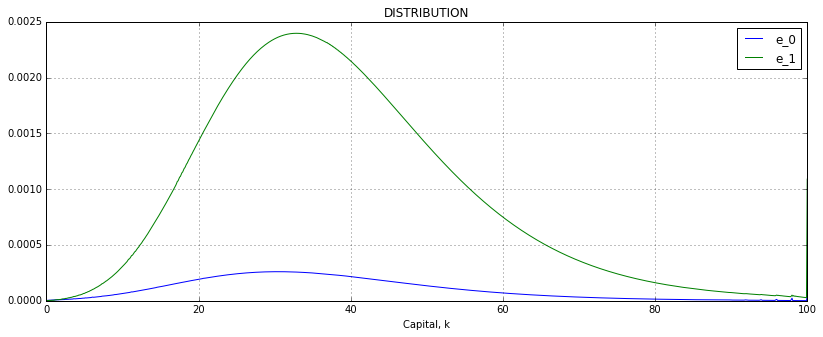

In [14]:
%matplotlib inline

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(kgridf, L[:Nkf],label='e_0')
plt.plot(kgridf, L[Nkf:],label='e_1')
plt.xlabel('Capital, k')
plt.title('DISTRIBUTION')
plt.legend()
plt.grid()

In [9]:
# Get kprime and consumption from the markov decision rule

kprimef = dst.mdr_to_sprime(model, mdr, Nkf)
mdrc = np.zeros([Nkf, Ne])
for i_m in range(Ne):
    mdrc[:, i_m] = mdr(i_m, kgridf.reshape(-1,1)).flatten()

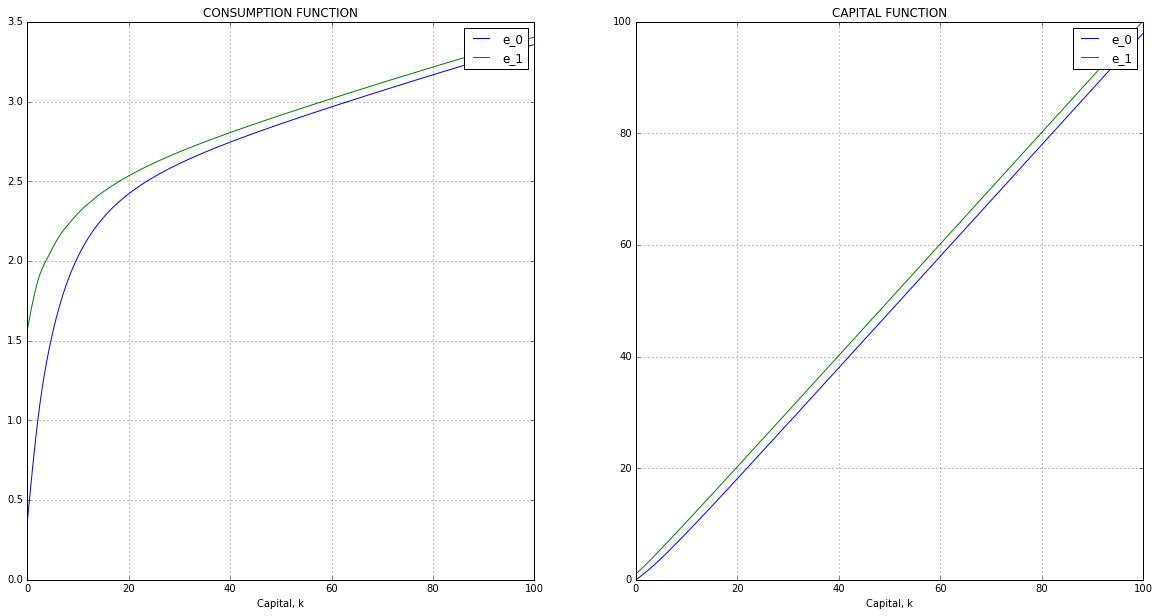

In [10]:
# Plot controls

%matplotlib inline
kgrid = mdr.grid

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(kgridf, mdrc[:,0],label='e_0')
plt.plot(kgridf, mdrc[:,1],label='e_1')
plt.xlabel('Capital, k')
plt.title('CONSUMPTION FUNCTION')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(kgridf, kprimef[:Nkf],label='e_0')
plt.plot(kgridf, kprimef[Nkf:],label='e_1')
plt.xlabel('Capital, k')
plt.title('CAPITAL FUNCTION')
plt.legend()
plt.grid()

#### Create a function that takes transition back to control

For models in which we can use the $s_{t+1}$ trick, need to create a function that takes this transition rule back to the control. 